# Preprocessing of Dataset
- Dataset file: "PM_train.txt"

Dataset Column Description (from official dataset data card)
- id
- - "A unique identifier for each data entry."
- cycle
- - "Denotes the operational cycle or period, indicating the stage or duration of engine operation."
- setting1, setting2, setting3
- - "Numerical values representing various operational settings or parameters of the aircraft engine."
- s1 to s21
- - "Numeric sensor readings obtained from 21 different sensors installed on the engine. These readings encompass a range of physical measurements, including but not limited to temperature, pressure, and other relevant parameters."

-------------------------------------------------------------------------------------------------------------------------------------------------------
Dataset loading via .xlsx file type. 

In [15]:
import matplotlib as plt
import numpy as np
import pandas as pd

# I chose to port data into the project via excel to ensure data preservation
pm_test_df = pd.read_excel('../data/dataset_a_s_e_p/PM_test.xlsx')

# Data exploration
print("Print first 20 rows of each column:\n", pm_test_df.head(20))

print("\nData description:\n")
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    print(pm_test_df.describe())

Print first 20 rows of each column:
     id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0    1      1    0.0023    0.0003       100  518.67  643.02  1585.29  1398.21   
1    1      2   -0.0027   -0.0003       100  518.67  641.71  1588.45  1395.42   
2    1      3    0.0003    0.0001       100  518.67  642.46  1586.94  1401.34   
3    1      4    0.0042    0.0000       100  518.67  642.44  1584.12  1406.42   
4    1      5    0.0014    0.0000       100  518.67  642.51  1587.19  1401.92   
5    1      6    0.0012    0.0003       100  518.67  642.11  1579.12  1395.13   
6    1      7    0.0000    0.0002       100  518.67  642.11  1583.34  1404.84   
7    1      8    0.0006    0.0000       100  518.67  642.54  1580.89  1400.89   
8    1      9   -0.0036    0.0000       100  518.67  641.88  1593.29  1412.28   
9    1     10   -0.0025   -0.0001       100  518.67  642.07  1585.25  1398.64   
10   1     11    0.0007   -0.0004       100  518.67  642.04  1581.03  14

-------------------------------------------------------------------------------------------------------------------------------------------------------
Dataset cleaning via generalized NA row drop. (Not required because data validity is at 100%)

In [13]:
# Check for missing data
print("\n Null values: \n", pm_test_df.isnull().sum()) # Verifies 100% data validity.


 Null values: 
 id          0
cycle       0
setting1    0
setting2    0
setting3    0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
s7          0
s8          0
s9          0
s10         0
s11         0
s12         0
s13         0
s14         0
s15         0
s16         0
s17         0
s18         0
s19         0
s20         0
s21         0
dtype: int64


In [14]:
# Generalized NA drop is not required because the data card indicates that 100% of the data is valid
# pm_test_df_clean = pm_test_df.dropna()
pm_test_df_clean = pm_test_df.copy()

# Confirmation of null removal
print("\n Null values: \n", pm_test_df_clean.isnull().sum())

# Check for constants
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    print(pm_test_df_clean.describe())


 Null values: 
 id          0
cycle       0
setting1    0
setting2    0
setting3    0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
s7          0
s8          0
s9          0
s10         0
s11         0
s12         0
s13         0
s14         0
s15         0
s16         0
s17         0
s18         0
s19         0
s20         0
s21         0
dtype: int64
                 id         cycle      setting1      setting2  setting3  \
count  11939.000000  11939.000000  11939.000000  11939.000000   11939.0   
mean      47.219281     76.401541     -0.000006      0.000001     100.0   
std       25.796561     52.750586      0.002199      0.000294       0.0   
min        1.000000      1.000000     -0.008200     -0.000600     100.0   
25%       25.000000     33.000000     -0.001500     -0.000200     100.0   
50%       49.000000     68.000000      0.000000      0.000000     100.0   
75%       68.000000    112.000000      0.001500      0.000300     100.0   
max   

Constants Identified
- Constants and near-zero:
- - setting1
  - setting2
  - setting3
  - s1
  - s6
  - s10
  - s16
  - s18
  - s19

-------------------------------------------------------------------------------------------------------------------------------------------------------
Dataset normalization via z-score
standarized scaling:
- Centering each feature to zero mean
- Scaling to unit variance

In [16]:
# Feature columns to ensure only features are normalized
# Setting 3 is a constant, so it is not normalized
feature_columns = [f's{i}' for i in range(1, 22) if i not in [1, 6, 10, 16, 18, 19]]

print(feature_columns)

# Pre-data "normalization" check
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    print(pm_test_df_clean.describe())

# Mean/STD calculation of pm_test
mean = pm_test_df_clean[feature_columns].mean()
std = pm_test_df_clean[feature_columns].std()

# Standardization of each column
pm_test_df_clean.loc[:, feature_columns] = (
    pm_test_df_clean[feature_columns] - mean) / std


# Scaling confirmation
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    print(pm_test_df_clean.describe())

['s2', 's3', 's4', 's5', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20', 's21']
                 id         cycle      setting1      setting2  setting3  \
count  11939.000000  11939.000000  11939.000000  11939.000000   11939.0   
mean      47.219281     76.401541     -0.000006      0.000001     100.0   
std       25.796561     52.750586      0.002199      0.000294       0.0   
min        1.000000      1.000000     -0.008200     -0.000600     100.0   
25%       25.000000     33.000000     -0.001500     -0.000200     100.0   
50%       49.000000     68.000000      0.000000      0.000000     100.0   
75%       68.000000    112.000000      0.001500      0.000300     100.0   
max       92.000000    303.000000      0.007800      0.000700     100.0   

                 s1            s2            s3            s4            s5  \
count  1.193900e+04  11939.000000  11939.000000  11939.000000  11939.000000   
mean   5.186700e+02    642.474090   1588.088548   1404.705402     1

- Columns excluded from model
- - True constants
  - Near constant
  - Columns excluded:
  - - s1, s6, s10, s16, s18, s19

# Implementation of Multi-feature Linear Regression with Batch Gradient Descent

For multi-feature linear regression, the model is:

y = Xw + b

- Where:
- - y = predicted value (vector)
- - X = input data matrix (rows=samples, columns=features)
- - w = weights (vector, one per feature)
- - b = bias/intercept (scalar)

In [17]:
# Prediction function/formula
def predict(X, w, b):
    # X: shape (n_samples, n_features)
    # w: shape (n_features,)
    # b: scalar
    return np.dot(X, w) + b

Cost function: MSE (Mean Squared Error)

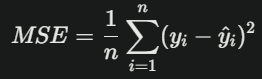


In [23]:
# MSE cost function implementation
def cost(y_actual, y_predict):
    return np.mean((y_actual - y_predict) ** 2)

Batch Gradient Descent Update Rule:

θ=θ−η⋅∇J(θ)

- Where:
- - θ: Represents the parameters or weights of the model that you want to optimize.
  - J(θ): Denotes the cost function (or loss function), which measures how well the model is performing given the parameters θ. The goal is to minimize this function.
  - ∇J(θ): Is the gradient of the cost function with respect to the parameters θ. This gradient is a vector that points in the direction of the steepest increase of the cost function.
  - η: Is the learning rate, a small positive scalar that determines the step size taken in the parameter space during each update.

# Run and Set-up of Batch Gradient Descent with Demo Data to Verify Functionality

In [27]:
# Set-up for learning model
# Example: create random (dummy) data for demo purposes
np.random.seed(42)          # .seed() ensures that the random numbers generated are the same each time the program is run
n_samples = 100
n_features = 3
X_test = np.random.randn(n_samples, n_features)    # Features matrix
weights_true = np.array([1.5, -2.0, 1.0])            # True weights (for testing)
y_actual = X_test @ weights_true + 0.5             # y = Xw + b, with true bias 0.5

In [28]:
# Initialize
n_features = X_test.shape[1] # Obtains length of training set
w = np.zeros(n_features)
b = 0.
learning_rate = 0.01
iterations = 100
total_cost = []

for i_1 in range(iterations):
    # Predict
    y_predict = predict(X_test, w, b)
    # Compute cost
    cost_per_it = cost(y_actual, y_predict)
    total_cost.append(cost_per_it)

    # Compute gradients
    # Gradient w.r.t w: -2/n * X.T @ (y_true - y_pred)
    # Gradient w.r.t b: -2/n * sum(y_true - y_pred)
    n = X_test.shape[0]
    dw = -2/n * np.dot(X_test.T, (y_actual - y_predict))
    db = -2/n * np.sum(y_actual - y_predict)

    # Update weights
    w -= learning_rate * dw
    b -= learning_rate * db

    # Print progress every 10 epochs (optional)
    if i_1 % 10 == 0:
        print(f"Iteration: {i_1}: cost={cost_per_it:.4f}")

print("Final weights:", w)
print("Final bias:", b)

Iteration: 0: cost=8.1401
Iteration: 10: cost=5.0957
Iteration: 20: cost=3.2344
Iteration: 30: cost=2.0841
Iteration: 40: cost=1.3644
Iteration: 50: cost=0.9079
Iteration: 60: cost=0.6141
Iteration: 70: cost=0.4220
Iteration: 80: cost=0.2944
Iteration: 90: cost=0.2083
Final weights: [ 1.12879223 -1.78252699  0.92507572]
Final bias: 0.5881315835675558


In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss Over Epochs")
plt.show()